In [244]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# scraping data from web using BeautifulSoup and Request

url = 'https://www.worldometers.info/world-population/population-by-country/'

page = requests.get(url)

soup = BeautifulSoup(page.text,'html')

table = soup.find('table')

world_column = table.find_all('th')
world_column_title = [columns.text for columns in world_column]

df = pd.DataFrame(columns = world_column_title)

world_row = table.find_all('tr')

for row in world_row[1:]:
    row_data = row.find_all('td')
    world_data = [data.text for data in row_data]

    length = len(df) 
    df.loc[length] =  world_data

df

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,450,935,791",0.89 %,"12,866,195",488,"2,973,190","-630,830",2.0,28,37 %,17.78 %
1,2,China,"1,419,321,278",-0.23 %,"-3,263,655",151,"9,388,211","-318,992",1.0,40,66 %,17.39 %
2,3,United States,"345,426,571",0.57 %,"1,949,236",38,"9,147,420","1,286,132",1.6,38,82 %,4.23 %
3,4,Indonesia,"283,487,931",0.82 %,"2,297,864",156,"1,811,570","-38,469",2.1,30,59 %,3.47 %
4,5,Pakistan,"251,269,164",1.52 %,"3,764,669",326,"770,880","-1,401,173",3.5,20,34 %,3.08 %
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Montserrat,"4,389",-0.70 %,-31,44,100,-7,1.4,42,11 %,0.00 %
230,231,Falkland Islands,"3,470",-0.20 %,-7,0,"12,170",-13,1.7,42,68 %,0.00 %
231,232,Tokelau,"2,506",4.55 %,109,251,10,72,2.6,27,0 %,0.00 %
232,233,Niue,"1,819",0.11 %,2,7,260,10,2.5,36,44 %,0.00 %


## Data cleaning

##### As you can see, there are 2 problems
- Mark ',' in 5 column and cannot convert to float
- Mark '%' in 3 column and cannot convert to float
- So I will solve it

In [279]:
columns_to_clean = ['Population (2024)', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)']

# Apply cleaning to those columns that are of string type
for col in columns_to_clean:
    if df[col].dtype == 'object':  # Check if the column is of object (string) type
        df[col] = df[col].str.replace(',', '').astype(float)

In [250]:
columns_to_clean2 = ['Urban Pop %', 'Yearly Change', 'World Share']

for col in columns_to_clean2:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(' %', '')
        df[col] = df[col].replace('N.A.', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col]/100

In [269]:
columns_to_clean3 = ['Fert. Rate', 'Med. Age']

for col in columns_to_clean3:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [271]:
#check column data types
df.dtypes

#                           object
Country (or dependency)     object
Population (2024)          float64
Yearly Change              float64
Net Change                 float64
Density (P/Km²)            float64
Land Area (Km²)            float64
Migrants (net)             float64
Fert. Rate                 float64
Med. Age                     int64
Urban Pop %                float64
World Share                float64
dtype: object

In [273]:
df.head()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1.450936e+09,0.0089,12866195.0,488.0,2973190.0,-630830.0,2.0,28,0.37,0.1778
1,2,China,1.419321e+09,-0.0023,-3263655.0,151.0,9388211.0,-318992.0,1.0,40,0.66,0.1739
2,3,United States,3.454266e+08,0.0057,1949236.0,38.0,9147420.0,1286132.0,1.6,38,0.82,0.0423
3,4,Indonesia,2.834879e+08,0.0082,2297864.0,156.0,1811570.0,-38469.0,2.1,30,0.59,0.0347
4,5,Pakistan,2.512692e+08,0.0152,3764669.0,326.0,770880.0,-1401173.0,3.5,20,0.34,0.0308


In [256]:
df.describe() 

,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Urban Pop %,World Share
count,2.340000e+02,234.000000,2.340000e+02,234.000000,2.340000e+02,2.340000e+02,216.000000,234.000000
mean,3.487407e+07,0.009424,3.002291e+05,488.683761,5.559568e+05,7.461111e+01,0.598704,0.004271
std,1.383471e+08,0.013671,1.064043e+06,2412.826175,1.691024e+06,1.792969e+05,0.239391,0.016952
min,4.960000e+02,-0.050400,-3.263655e+06,0.000000,0.000000e+00,-1.401173e+06,0.000000,0.000000
25%,4.782600e+05,0.000100,7.525000e+01,38.500000,2.650000e+03,-1.176800e+04,0.417500,0.000100
50%,5.615064e+06,0.008600,1.878150e+04,96.500000,7.972000e+04,-5.045000e+02,0.620000,0.000700
75%,2.346508e+07,0.018750,2.139155e+05,254.000000,4.070800e+05,3.452500e+03,0.800000,0.002875
max,1.450936e+09,0.050700,1.286620e+07,25927.000000,1.637687e+07,1.286132e+06,1.000000,0.177800


In [258]:
df.isna().sum() # check if there is any NA in any column

#                           0
Country (or dependency)     0
Population (2024)           0
Yearly Change               0
Net Change                  0
Density (P/Km²)             0
Land Area (Km²)             0
Migrants (net)              0
Fert. Rate                  0
Med. Age                    0
Urban Pop %                18
World Share                 0
dtype: int64

- There are 18 NA values in column Urban Pop %, and it depends on its own country, so i decided to put value 0 to these NA

In [263]:
# Fill NaN with 0
df['Urban Pop %'] = df['Urban Pop %'].fillna(0)

In [265]:
df.isna().sum() # There is no NA left

#                          0
Country (or dependency)    0
Population (2024)          0
Yearly Change              0
Net Change                 0
Density (P/Km²)            0
Land Area (Km²)            0
Migrants (net)             0
Fert. Rate                 0
Med. Age                   0
Urban Pop %                0
World Share                0
dtype: int64

In [260]:
df.duplicated().sum() # check if there is duplicated value

0

## EDA

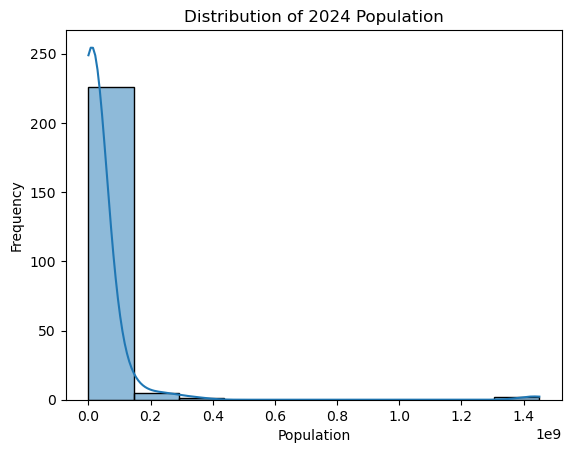

In [32]:
# visualize the distribution of population
sns.histplot(df['Population (2024)'], bins = 10, kde = True)
plt.title('Distribution of 2024 Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()

- The population are mostly in 0-0.2 million with more than 200 countries
- The number of countries with around 0.4-1.3 million people is nearly 0
- Only 2 countries has more than 1.4 million people
  

<Axes: xlabel='Population (2024)', ylabel='Density (P/Km²)'>

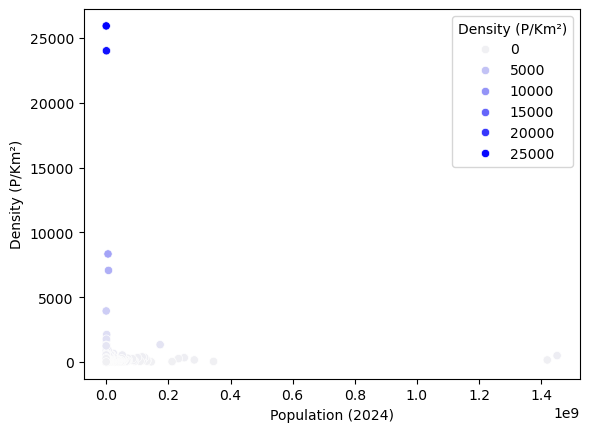

In [66]:
colors = sns.light_palette("blue", as_cmap=True)
sns.scatterplot(x = "Population (2024)", y = "Density (P/Km²)", hue = "Density (P/Km²)", data = df, palette = colors)


- The density is mostly approximate < 5000 (p/km2)
- Only 2 higher values are different from the others

In [38]:
# Sort top 10 highest population countries
top_10_country = df.sort_values(by = 'Population (2024)',ascending = False).head(10)

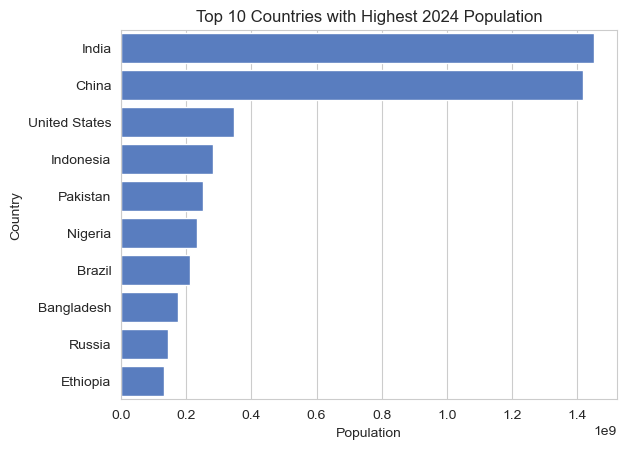

In [70]:
sns.set_style('whitegrid')
sns.set_palette('muted')
sns.barplot(x = 'Population (2024)', y = 'Country (or dependency)', data = top_10_country)
plt.title('Top 10 Countries with Highest 2024 Population')
plt.ylabel('Country')
plt.xlabel('Population')
plt.show()

- India and China are on top and far away from the others

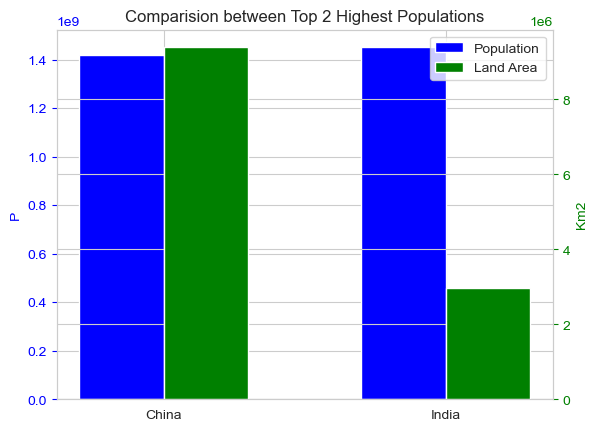

In [172]:
china_population = top_10_country.loc[top_10_country['Country (or dependency)'] == 'China', 'Population (2024)'].values[0]
india_population = top_10_country.loc[top_10_country['Country (or dependency)'] == 'India', 'Population (2024)'].values[0]

china_land_area = top_10_country.loc[top_10_country['Country (or dependency)'] == 'China', 'Land Area (Km²)'].values[0]
india_land_area = top_10_country.loc[top_10_country['Country (or dependency)'] == 'India', 'Land Area (Km²)'].values[0]


fig, ax1 = plt.subplots()
x = ['China', 'India']
y1 = [china_population, india_population]
y2 = [china_land_area, india_land_area]
# Plot the first dataset on the first Y-axis
ax1.bar(x, y1, color = 'b', label='Population', width = -0.3, align = 'edge')  # Shorthand 'b' for blue color
 
# Set labels and ticks for the first Y-axis
ax1.set_ylabel('P', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
 
# Set labels and ticks for the first Y-axis
ax2.bar(x, y2, color = 'g', label='Land Area', width = 0.3, align = 'edge')
ax2.set_ylabel('Km2', color='g')
ax2.tick_params('y', colors='g')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

lines = lines1 + lines2
labels = labels1 + labels2
plt.legend(lines, labels, loc='upper right')

plt.title('Comparision between Top 2 Highest Populations')
plt.show()

- India has a bit higher population than China but it's Land Area is quiet lower than China
- Population Density in India is a significantly high number in the world, it can lead to some issues in economy and social life of residents

In [281]:
df.head()

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,1.450936e+09,0.0089,12866195.0,488.0,2973190.0,-630830.0,2.0,28,0.37,0.1778
1,2,China,1.419321e+09,-0.0023,-3263655.0,151.0,9388211.0,-318992.0,1.0,40,0.66,0.1739
2,3,United States,3.454266e+08,0.0057,1949236.0,38.0,9147420.0,1286132.0,1.6,38,0.82,0.0423
3,4,Indonesia,2.834879e+08,0.0082,2297864.0,156.0,1811570.0,-38469.0,2.1,30,0.59,0.0347
4,5,Pakistan,2.512692e+08,0.0152,3764669.0,326.0,770880.0,-1401173.0,3.5,20,0.34,0.0308


In [287]:
df.sort_values(by = 'Med. Age', ascending = False).head(10)

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
233,234,Holy See,496.0,0.0000,0.0,1240.0,0.0,18.0,1.0,59,0.00,0.0000
215,216,Monaco,38631.0,-0.0083,-325.0,25927.0,1.0,110.0,2.1,54,0.00,0.0000
228,229,Saint Helena,5237.0,-0.0098,-52.0,13.0,390.0,4.0,1.6,51,0.33,0.0000
180,181,Martinique,343195.0,-0.0081,-2807.0,324.0,1060.0,-2744.0,2.0,49,0.00,0.0000
11,12,Japan,123753041.0,-0.0050,-617906.0,339.0,364555.0,153357.0,1.2,49,0.93,0.0152
217,218,San Marino,33581.0,-0.0045,-152.0,560.0,60.0,37.0,1.2,48,1.00,0.0000
24,25,Italy,59342867.0,-0.0026,-156586.0,202.0,294140.0,95246.0,1.2,48,0.72,0.0073
227,228,Saint Pierre & Miquelon,5628.0,-0.0093,-53.0,24.0,230.0,-2.0,1.3,47,0.00,0.0000
104,105,Hong Kong,7414909.0,-0.0037,-27825.0,7062.0,1050.0,-19272.0,0.7,47,0.00,0.0009
92,93,Portugal,10425292.0,-0.0005,-5446.0,114.0,91590.0,20648.0,1.5,47,0.66,0.0013


In [295]:
df.sort_values(by = 'Fert. Rate', ascending = False).head(10)

,#,Country (or dependency),Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
14,15,DR Congo,109276265.0,0.0330,3486534.0,48.0,2267050.0,-26968.0,6.0,16,0.44,0.0134
67,68,Somalia,19009151.0,0.0354,650536.0,30.0,627340.0,26859.0,6.0,16,0.46,0.0023
121,122,Central African Republic,5330690.0,0.0346,178269.0,9.0,622980.0,-15357.0,6.0,14,0.44,0.0007
64,65,Chad,20299123.0,0.0507,980059.0,16.0,1259200.0,204040.0,6.0,16,0.22,0.0025
53,54,Niger,27032412.0,0.0334,872545.0,21.0,1266700.0,-4041.0,5.9,15,0.18,0.0033
57,58,Mali,24478595.0,0.0298,709468.0,20.0,1220190.0,-46880.0,5.5,16,0.44,0.0030
40,41,Angola,37885849.0,0.0309,1135943.0,30.0,1246700.0,-2629.0,5.0,17,0.68,0.0046
35,36,Afghanistan,42647492.0,0.0288,1192731.0,65.0,652860.0,-44089.0,4.8,17,0.27,0.0052
77,78,Burundi,14047786.0,0.0262,358336.0,547.0,25680.0,-27074.0,4.8,16,0.14,0.0017
44,45,Mozambique,34631766.0,0.0296,996606.0,44.0,786380.0,-38940.0,4.7,16,0.41,0.0042


- From the table above, we can see that Fert. Rate is strictly high, while Med. Rate is really low
- So I want to calculate the correlation value between 2 variables

In [291]:
correlation = df['Fert. Rate'].corr(df['Med. Age'])

print(correlation)

-0.8496372961576971


- the result reflects a huge negative correlation.
- To explain for this phenom, when Fert. Rate is high, which means average number of children born to women is higher and the number of young people is more than, which leads to a low Med. Age (Half of the population is older than the median age and half of the population is younger)

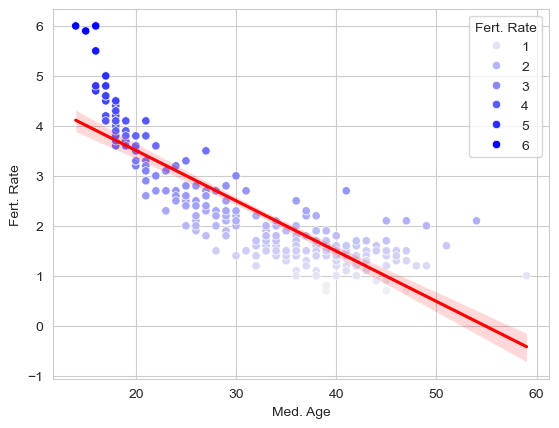

In [325]:
sns.scatterplot(x = "Med. Age", y = "Fert. Rate", hue = "Fert. Rate", data = df, palette = colors)
sns.regplot(x = "Med. Age", y = "Fert. Rate", scatter = False, line_kws = {"color":"red"}, data = df)
plt.show()